# Interim Operational Capability 1

## Set up.

### Import packages.

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath("../../src"))

In [2]:
import numpy             as np
import matplotlib.pyplot as pl
import pandas            as pd
import seaborn           as sb
import tyche             as ty

from copy            import deepcopy
from IPython.display import Image 

In [3]:
eere_color_lst = ["#6ABC45", "#FFCB06", "#00A8DF"]
pl.rcParams['axes.prop_cycle'] = pl.cycler(color=eere_color_lst)

## Load data.

### The data are stored in a set of tab-separated value files in a folder.

In [4]:
designs = ty.Designs("data")

In [5]:
investments = ty.Investments("data")

### Compile the production and metric functions for each technology in the dataset.

In [6]:
designs.compile()

## Examine the input data.

### The `functions` table specifies where the Python code for each technology resides.

In [7]:
designs.functions

,Style,Module,Capital,Fixed,Production,Metrics,Notes
Technology,,,,,,,
PV Generic,numpy,pv_residential_generic,capital_cost,fixed_cost,production,metrics,generic residential PV


### The `indices` table defines the subscripts for variables.

In [8]:
designs.indices.drop("Offset", axis = 1);

### The `designs` table contains the cost, input, efficiency, and price data for a scenario.

In [9]:
designs.designs.xs("Reference", level = "Scenario", drop_level = False);

### The `parameters` table contains additional techno-economic parameters for each technology.

In [10]:
designs.parameters.drop("Offset", axis = 1).xs("Reference", level = "Scenario", drop_level = False);

### The `results` table specifies the units of measure for results of computations.

In [11]:
designs.results;

### The `tranches` table specifies multually exclusive possibilities for investments: only one `Tranch` may be selected for each `Category`.

In [12]:
investments.tranches.xs("CIGS", level="Category").reset_index()

,Tranche,Scenario,Amount,Notes
0,CIGS 0,CIGS 0,0.0,
1,CIGS 1,CIGS 1,1500000.0,
2,CIGS 2,CIGS 2,3000000.0,


In [13]:
# investments.tranches.reset_index()

In [14]:
data = investments.tranches.reset_index()
# g = sb.FacetGrid(data, row="Category")
# g.map(sb.barplot, x="Amount", y="Tranche");
# g.set_titles("")
# g.set(yticks=[], ylabel="", xlabel="", xticks=[])
# g.despine(bottom=True, left=True)

### The `investments` table bundles a consistent set of tranches (one per category) into an overall investment.

In [15]:
investments.investments

Notes
Investment   Category          Tranche                  
High R&D     CIGS              CIGS 2                   
             CdTe              CdTe 2                   
             GaAs              GaAs 2                   
             InGaP             InGaP 2                  
             Perovskite        Perovskite 2             
             Polysilicon       Polysilicon 2            
             Power Electronics Power Electronics 2      
             Soft Costs        Soft Costs 2             
Moderate R&D CIGS              CIGS 1                   
             CdTe              CdTe 1                   
             GaAs              GaAs 1                   
             InGaP             InGaP 1                  
             Perovskite        Perovskite 1             
             Polysilicon       Polysilicon 1            
             Power Electronics Power Electronics 1      
             Soft Costs        Soft Costs 1             
No R&D       CIGS              CIGS 0                   
             CdTe              CdTe 0                   
             GaAs              GaAs 0                   
             InGaP             InGaP 0                  
             Perovskite        Perovskite 0             
             Polysilicon       Polysilicon 0            
             Power Electronics Power Electronics 0      
             Soft Costs        Soft Costs 0

## Evaluate the scenarios in the dataset.

In [16]:
scenario_results = designs.evaluate_scenarios(sample_count=500)

Evaluating PV Generic


/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Designs.py:373: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  costs   = costs.append(  result.cost  )
/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Designs.py:374: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outputs = outputs.append(result.output)
/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Designs.py:375: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append(result.metric)
/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Designs.py:388: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return organize("Cost", costs).append(
/Users/tghosh

#### Format results as a pivot table.

In [17]:
scenario_results.xs(
    "PV Generic"
).groupby(
    ["Scenario", "Variable", "Index"]
).aggregate(
    np.mean
).xs(
    "Metric", level = 1
).pivot_table(
    index = "Scenario", columns = "Index"
)

Value                                 \
Index                     Capital Efficiency       GHG Hazardous   
Scenario                                                           
CIGS 0              -7.914140e-01   0.234490 -0.000449  0.055660   
CIGS 1              -2.046026e-01   0.265194 -0.000449  0.044868   
CIGS 2               1.167327e-01   0.274802 -0.000449  0.037790   
CdTe 0              -4.184828e-01   0.235708 -0.000449  0.053868   
CdTe 1              -1.004578e-01   0.255149 -0.000449  0.045861   
CdTe 2               2.545344e-01   0.285993 -0.000449  0.036811   
GaAs 0              -2.386790e-01   0.312326 -0.000449  0.075730   
GaAs 1              -1.991668e-02   0.313097 -0.000449  0.074290   
GaAs 2               4.574208e-01   0.344527 -0.000449  0.066199   
InGaP 0              3.854120e-01   0.403412 -0.000449  0.023552   
InGaP 1              7.392741e-01   0.410129 -0.000449  0.018450   
InGaP 2              9.511129e-01   0.397467 -0.000449  0.018080   
Perovskite 0        -1.130991e+00   0.180936 -0.000449  0.024961   
Perovskite 1        -3.772833e-01   0.225275 -0.000449  0.016942   
Perovskite 2         3.489765e-01   0.294862 -0.000449  0.008609   
Polysilicon 0        2.110367e-01   0.232240 -0.000449  0.247741   
Polysilicon 1        3.381926e-01   0.245267 -0.000449  0.204492   
Polysilicon 2        5.707059e-01   0.274359 -0.000449  0.150006   
Power Electronics 1  2.941807e-01   0.233466 -0.000449  0.234613   
Power Electronics 2  3.768324e-01   0.233655 -0.000449  0.227375   
Reference           -4.304827e-07   0.208000 -0.000449  0.275327   
Soft Costs 1         3.020213e-01   0.232972 -0.000449  0.246855   
Soft Costs 2         4.671757e-01   0.232885 -0.000449  0.247037   

                                                                     
Index                        LCOE   Lifetime Strategic        Yield  
Scenario                                                             
CIGS 0              -6.303185e-02  25.001261  0.013780   964.368121  
CIGS 1              -3.956447e-02  25.001241  0.011786   954.519051  
CIGS 2              -2.122023e-02  25.001239  0.010502   996.402895  
CdTe 0              -1.307817e-02  25.001277  0.031516  1278.373839  
CdTe 1              -4.220559e-04  25.001216  0.025630  1318.045655  
CdTe 2               1.221172e-02  25.001272  0.021599  1350.940636  
GaAs 0              -7.452435e-03  25.001239  0.007309  1278.376010  
GaAs 1              -3.436910e-04  25.001224  0.006242  1282.253209  
GaAs 2               1.498595e-02  25.001249  0.004893  1290.109141  
InGaP 0             -1.418796e-03  20.494996  0.003104  1310.585952  
InGaP 1              1.252231e-02  20.499773  0.002373  1323.783409  
InGaP 2              2.033633e-02  20.503123  0.002368  1323.760436  
Perovskite 0        -7.906012e-02  17.520894  0.007591  1335.716113  
Perovskite 1        -4.482175e-02  17.462312  0.005201  1359.410944  
Perovskite 2        -1.425183e-02  17.442086  0.003634  1359.581384  
Polysilicon 0        6.618544e-03  25.001261  0.000000  1278.378392  
Polysilicon 1        1.175215e-02  25.001223  0.000000  1298.110240  
Polysilicon 2        2.094638e-02  25.001246  0.000000  1338.142099  
Power Electronics 1  1.292469e-02  25.001228  0.000000  1342.566307  
Power Electronics 2  1.755159e-02  25.001269  0.000000  1384.531804  
Reference           -1.946058e-07  25.000000  0.000000  1278.202148  
Soft Costs 1         9.464990e-03  25.001211  0.000000  1278.375997  
Soft Costs 2         1.463249e-02  25.001260  0.000000  1278.375737

#### Print the units for the columns.

In [18]:
designs.results.loc["PV Generic", "Metric"].transpose()

Index,Capital,Efficiency,GHG,Hazardous,LCOE,Lifetime,Strategic,Yield
Units,Œî$/Wdc,%/100,ŒîgCO2e/system,g/kWh,Œî$/kWh,yr,g/kWh,hr/yr
Notes,,,,,,,,


### Save results.

In [19]:
scenario_results.to_csv("output/example-scenario.csv")

### Plot the results.

In [20]:
display(investments.tranches.head(2))
display(scenario_results.head(2))

Amount Notes
Category Tranche Scenario                 
CIGS     CIGS 0  CIGS 0          0.0      
         CIGS 1  CIGS 1    1500000.0

Value     Units
Technology Scenario Sample Variable Index                          
PV Generic CIGS 0   1      Cost     Cost     29972.067325  $/system
                           Metric   Capital     -0.735565   Œî$/Wdc

In [21]:
# https://stackoverflow.com/a/55262258 - move box plots closer together
# a,b = ax.get_ylim()
# ax.set_ylim(a+val, b-val)
data_all = investments.tranches.join(scenario_results).reset_index()
data_all["Category"].unique()

array(['CIGS', 'CdTe', 'GaAs', 'InGaP', 'Perovskite', 'Polysilicon',
       'Power Electronics', 'Soft Costs'], dtype=object)

In [22]:

# val=1
# sb.violinplot(x="Value", y="Category", hue="Tranche", data=data)
# sb.despine(offset=10, trim=True)
# ax.set_ylim(-val, 1+val)
# a,b = ax.get_ylim()
# ax.set_ylim(a+val, b-val)
# sb.kdeplot(x="Value", hue="Tranche", data=data, fill=True)
# data["diff"] = np.where(data["Scenario"] != data["Tranche"], True, False)
# data["Tranche"].unique()
# data[]
# scenario_results.xs(
#     "PV Generic"
# ).groupby(
#     ["Scenario", "Variable", "Index"]
# ).aggregate(
#     np.mean
# ).xs(
#     "Metric", level = 1
# )

In [23]:
# tips = sns.load_dataset("tips")
# ax = sns.violinplot(x="day", y="total_bill", hue="sex",
#                     data=tips, palette="Set2", split=True,
#                     scale="count", inner="stick",
#                     scale_hue=False, bw=.2, width=2.5,
#                     order=('Thur', 'Fri', '', 'Sat', '', 'Sun'))

In [24]:
# df = pd.DataFrame(dict(x=np.repeat([0, 3, 5, 6], 10),
#                        y=np.random.randn(40)))
# sb.boxplot(x="x", y="y", data=df, order=np.arange(7))


In [25]:
# # import seaborn as sns, matplotlib.pyplot as plt
# scenario_list = ['None','Low','High']
# # tips = sns.load_dataset("tips")
# ax = sb.violinplot(y="Scenario", x="Value",
#                     data=data, palette="Set2",
#                     scale="count",
#                     bw=.2, width=2.5,
#                     order=scenario_list)

# # get rid of ticks for empty columns (levels)
# ax.set_yticks([0,1,3])
# ax.set_yticklabels(['Thur', 'Fri', 'Sat'])

# pl.show()

In [26]:
investment_level = {0: "None", 1: "Low", 2: "High"}

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 0, label, fontweight="bold",
            ha="right", va="center", transform=ax.transAxes)

LINEWIDTH = 2

In [27]:
data = investments.tranches.join(scenario_results)
# data = data[data.index.get_level_values("Index").isin(["Capital", "Efficiency", "Hazardous", "LCOE", "Strategic", "Yield"])]
data = data[data.index.get_level_values("Index").isin(["Capital", "Efficiency", "Hazardous"])]
data = data.xs(["Metric","CIGS"], level=["Variable","Category"]).reset_index()
data.head()

/var/folders/sm/spdh5zkx26v6vh_fk8w7p8456l6sp0/T/ipykernel_93284/2646693674.py:4: FutureWarning: Passing lists as key for xs is deprecated and will be removed in a future version. Pass key as a tuple instead.
  data = data.xs(["Metric","CIGS"], level=["Variable","Category"]).reset_index()


,Scenario,Tranche,Technology,Sample,Index,Amount,Notes,Value,Units
0,CIGS 0,CIGS 0,PV Generic,1,Capital,0.0,,-0.735565,Œî$/Wdc
1,CIGS 0,CIGS 0,PV Generic,1,Efficiency,0.0,,0.237303,%/100
2,CIGS 0,CIGS 0,PV Generic,1,Hazardous,0.0,,0.058907,g/kWh
3,CIGS 0,CIGS 0,PV Generic,2,Capital,0.0,,-0.704941,Œî$/Wdc
4,CIGS 0,CIGS 0,PV Generic,2,Efficiency,0.0,,0.242831,%/100


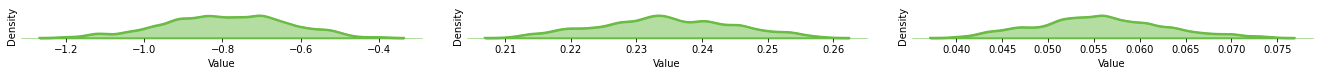

In [28]:
data_cigs = data[data['Scenario']=='CIGS 0']
g = sb.FacetGrid(data_cigs, col="Index", row="Scenario", hue="Scenario", sharex='col', sharey=False, aspect=5, height=1.25)
g.map(sb.kdeplot, "Value",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=0.5, linewidth=LINEWIDTH)
g.map(sb.kdeplot, "Value", clip_on=False, linewidth=LINEWIDTH, bw_adjust=.5)
g.map(pl.axhline, y=0, linewidth=LINEWIDTH/4, clip_on=False)

# Set the subplots to overlap

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [29]:
investments.tranches.head(2)

Amount Notes
Category Tranche Scenario                 
CIGS     CIGS 0  CIGS 0          0.0      
         CIGS 1  CIGS 1    1500000.0

In [30]:
index_list = list(scenario_results.reset_index()["Index"].unique()[[1,2,4]])
category_list = list(investments.tranches.reset_index()["Category"].unique()[0:3])

data_mi = investments.tranches.join(scenario_results)
data_mi = data_mi[data_mi.index.get_level_values("Index").isin(index_list)]
data_mi = data_mi[data_mi.index.get_level_values("Category").isin(category_list)]

data = data_mi.xs("Metric", level="Variable").reset_index()
data["Amount"] = [investment_level[int(x[-1])] for x in data["Tranche"]]

data = data.drop(["Technology","Notes"], axis=1)
data["Scenario"] = [investment_level[int(x[-1])] for x in data["Tranche"]]
data.head()

,Scenario,Category,Tranche,Sample,Index,Amount,Value,Units
0,None,CIGS,CIGS 0,1,Capital,None,-0.735565,Œî$/Wdc
1,None,CIGS,CIGS 0,1,Efficiency,None,0.237303,%/100
2,None,CIGS,CIGS 0,1,Hazardous,None,0.058907,g/kWh
3,None,CIGS,CIGS 0,2,Capital,None,-0.704941,Œî$/Wdc
4,None,CIGS,CIGS 0,2,Efficiency,None,0.242831,%/100


In [31]:
data1 = data_mi.xs(["Metric",index_list[0],category_list[0]], level=["Variable","Index","Category"]).reset_index()
data1["Scenario"] = [investment_level[int(x[-1])] for x in data1["Tranche"]]
data1.head()

/var/folders/sm/spdh5zkx26v6vh_fk8w7p8456l6sp0/T/ipykernel_93284/708539299.py:1: FutureWarning: Passing lists as key for xs is deprecated and will be removed in a future version. Pass key as a tuple instead.
  data1 = data_mi.xs(["Metric",index_list[0],category_list[0]], level=["Variable","Index","Category"]).reset_index()


,Scenario,Tranche,Technology,Sample,Amount,Notes,Value,Units
0,None,CIGS 0,PV Generic,1,0.0,,-0.735565,Œî$/Wdc
1,None,CIGS 0,PV Generic,2,0.0,,-0.704941,Œî$/Wdc
2,None,CIGS 0,PV Generic,3,0.0,,-0.717196,Œî$/Wdc
3,None,CIGS 0,PV Generic,4,0.0,,-0.587496,Œî$/Wdc
4,None,CIGS 0,PV Generic,5,0.0,,-0.699905,Œî$/Wdc


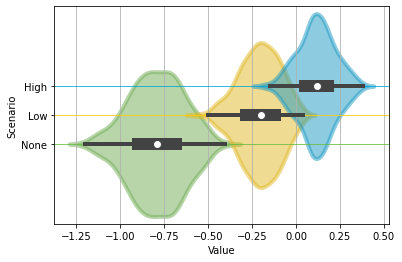

In [32]:
scenario_list = ["None","Low","High"]
WIDTH = 5

ax = sb.violinplot(
    data=data1,
    x="Value",
    y="Scenario",
    # hue="Scenario",
    # row="Category",
    # col="Index",
    # kind="violin",
    # height=2,
    # aspect=2,
    # sharex='col',
    # sharey='row',
    order=["None","Low","High"],
    linewidth=LINEWIDTH*2,
    split=True,
    scale="count",
    width=WIDTH,
    alpha=0.5,
    # bw=0.2,
    # color="b",
    # margin_titles=True,
)

alpha = 0.5
for violin in ax.collections[::2]:
    violin.set_alpha(alpha)
    violin.set_edgecolor(violin.get_facecolor())

ax.set_ylim(0-(WIDTH/2)*1.1,2+(WIDTH/2)*1.1)

ax.grid()

for ii, line in enumerate(ax.get_ygridlines()):
    line.set_color(eere_color_lst[ii])

2 Œî$/Wdc
2 %/100
2 g/kWh


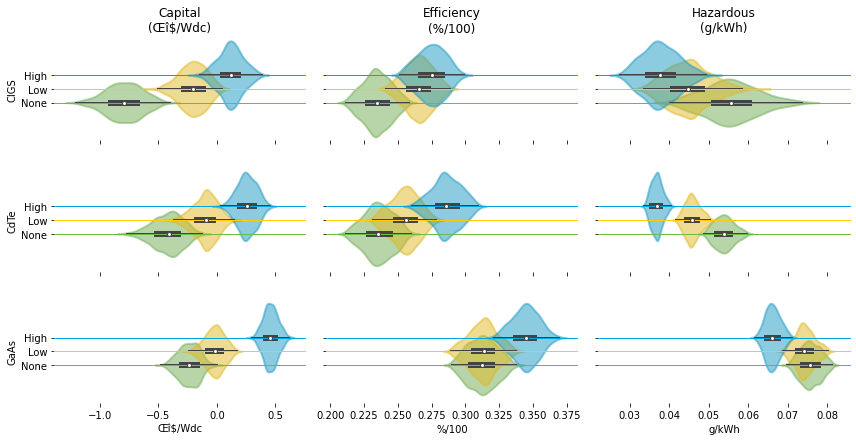

In [33]:
category_list = list(data["Category"].unique())
index_list = data[["Index","Units"]].drop_duplicates().values.tolist()
LINEWIDTH = 1

g = sb.catplot(
    data=data,
    x="Value",
    y="Scenario",
    row="Category",
    col="Index",
    kind="violin",
    height=2,
    aspect=2,
    sharex='col',
    sharey='row',
    order=["None","Low","High"],
    linewidth=LINEWIDTH*2,
    width=WIDTH,
    # bw=0.2,
    # color="b",
    # margin_titles=True,
)

for kk in range(len(data1["Scenario"].unique())):
    g.map(pl.axhline, y=kk, linewidth=LINEWIDTH, clip_on=False, color=eere_color_lst[kk])

(g.set_titles("")
  .set_ylabels("")
  .set_xlabels("")
  .despine(
      left=True,
      bottom=True,
  )
)

# g.fig.subplots_adjust(hspace=-0.75)
alpha = 0.5

ROW, COL = len(g.axes), len(g.axes[0])
for ii, cat in zip(range(ROW), category_list):
    for jj, idx in zip(range(COL), index_list):
        if ii==0:   g.axes[0,jj].set_title(idx[0] + "\n(" + idx[1] + ")")
        if ii==ROW-1:
            print(ii,idx[1])
            g.axes[ii,jj].set_xlabel(idx[1])
        g.axes[ii,jj].set_ylim(0-(WIDTH/2)*1.1,2+(WIDTH/2)*1.1)

        for violin in g.axes[ii,jj].collections[::2]:
            violin.set_alpha(alpha)
            violin.set_edgecolor(violin.get_facecolor())

        # g.axes[ii,jj].set_yticks([0.5,1.0,1.5])
    g.axes[ii,0].set_ylabel(cat)

In [34]:
# def aggregate_over(ser, idx, statistic = np.mean):
#     ser = ser.astype("float64")
#     idx_res = list(set(ser.index.names.copy()) - set(idx))
#     return ser.groupby(idx_res).aggregate(statistic)

In [35]:
np.std(list(range(500)))

144.33727862198316

In [36]:
def aggregate_over(df, idx, fun):
    if "Sample" in data.columns:
        df = df.drop("Sample", axis=1)
    
    idx = list(set(data.columns) - set(["Sample","Value"]))
    df = df.groupby(idx).aggregate(fun)
    return df.rename(columns={"Value": fun.__name__})

In [ ]:
g = sb.FacetGrid(
    data = investments.tranches.join(scenario_results).xs("Metric", level="Variable").reset_index(),
    row = "Category",
    col = "Index",
    sharex = False,
    sharey = False,
)
g.map(
    sb.boxplot,
    "Value",
    "Tranche",
)

/Users/tghosh/miniconda3/envs/tyche/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


## Evaluate the investments in the dataset.

In [ ]:
investment_results = investments.evaluate_investments(designs, sample_count=500)

### Costs of investments.

In [ ]:
investment_results.amounts

### Benefits of investments.

In [ ]:
investment_results.summary.set_index(
    "Units", append = True
).groupby(
    ["Investment", "Index", "Units"]
).aggregate(
    np.mean
).pivot_table(
    index = ["Index", "Units"],
    columns = "Investment",
)

### Save results.

In [ ]:
investment_results.amounts.to_csv("output/example-investment-amounts.csv")

In [ ]:
investment_results.metrics.to_csv("output/example-investment-metrics.csv")

### Plot the results.

In [ ]:
investment_results.summary

In [ ]:
investment_results.summary

In [ ]:
investment_results.summary[
    investment_results.summary.index.get_level_values("Index").isin(["Capital", "Efficiency", "Hazardous", "LCOE", "Strategic", "Yield"])
]